<a href="https://colab.research.google.com/github/parulian-johannes/Tugas_Interpolasi/blob/main/Tugas_interpolasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

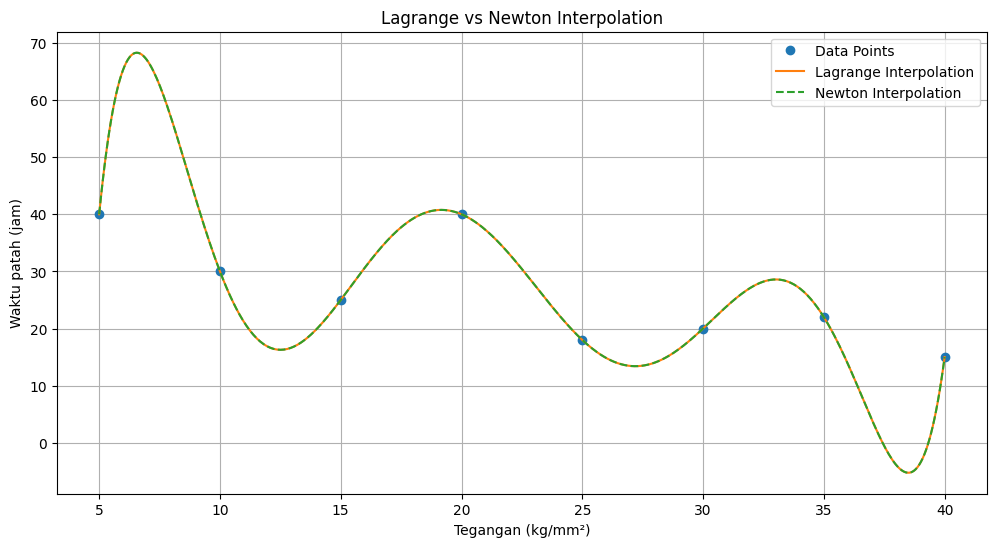

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def lagrange_interpolation(xi, yi, x):
    def L(k, x):
        result = 1
        for j in range(len(xi)):
            if j != k:
                result *= (x - xi[j]) / (xi[k] - xi[j])
        return result

    y_interp = 0
    for i in range(len(yi)):
        y_interp += yi[i] * L(i, x)
    return y_interp

def newton_interpolation(xi, yi, x):
    def divided_diff(xi, yi):
        n = len(yi)
        coef = np.zeros([n, n])
        coef[:,0] = yi

        for j in range(1,n):
            for i in range(n-j):
                coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (xi[i+j] - xi[i])

        return coef[0, :]  # return first row

    coef = divided_diff(xi, yi)
    n = len(coef)
    y_interp = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - xi[j])
        y_interp += term
    return y_interp

# Create a range of x values for plotting
x_range = np.linspace(5, 40, 500)

# Calculate interpolated values for each x in the range using both methods
y_lagrange_range = [lagrange_interpolation(x, y, xi) for xi in x_range]
y_newton_range = [newton_interpolation(x, y, xi) for xi in x_range]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_range, y_lagrange_range, '-', label='Lagrange Interpolation')
plt.plot(x_range, y_newton_range, '--', label='Newton Interpolation')
plt.xlabel('Tegangan (kg/mm²)')
plt.ylabel('Waktu patah (jam)')
plt.title('Lagrange vs Newton Interpolation')
plt.legend()
plt.grid(True)
plt.show()
